In [1]:
import sys, time
import os.path
import argparse
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [42]:
filename = "../dali-u100_fel1d.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print(hdf)
print()

reading  ../dali-u100_fel1d.hdf5
<HDF5 file "dali-u100_fel1d.hdf5" (mode r)>



In [43]:
# Get the group
fields = hdf['InteractionField']
print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
dt = fields.attrs['dt']
print(N_field, N_steps, dt)

a = np.array(fields)
hdf.close()

print(f'have read {a.shape} array.')


<KeysViewHDF5 ['N_field', 'N_steps', 'dt']>
300 1502 3.335640951981521e-14
have read (1502, 300) array.


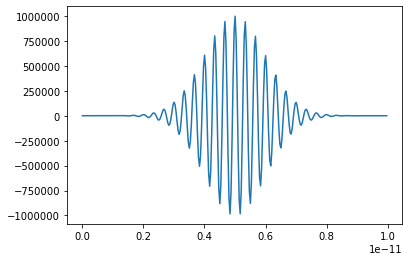

In [44]:
E_x = np.array(a[20])
t = dt*np.arange(E_x.shape[0])
plt.plot(t,E_x)
plt.show()